# Cats and Dogs Classification 
This program uses a deep learning model to classify images as either cats or dogs. It is based on the Keras library and trained on a dataset of cat and dog images. <br>
The structure of the dataset files that are downloaded looks like this (You will notice that the test directory has no subdirectories and the images are not labeled):<br>

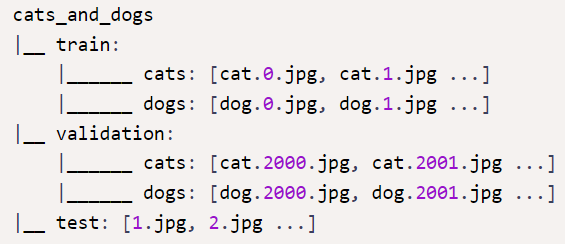


In [2]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [4]:
# 3
train_image_generator = ImageDataGenerator(rescale=1.0/255.0,)
validation_image_generator = ImageDataGenerator(rescale=1.0/255.0,)
test_image_generator = ImageDataGenerator(rescale=1.0/255.0,)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size = (IMG_HEIGHT,IMG_WIDTH),
    batch_size = batch_size,
    class_mode='binary'
)
val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size = (IMG_HEIGHT,IMG_WIDTH),
    batch_size = batch_size,
    class_mode='binary'
)
test_data_gen = test_image_generator.flow_from_directory(
    directory=PATH,
    classes=['test'],
    target_size = (IMG_HEIGHT,IMG_WIDTH),
    batch_size = batch_size,
    class_mode='binary',
    shuffle = False
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


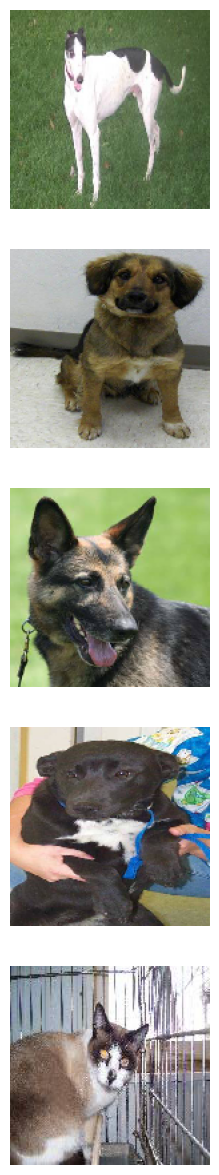

In [5]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [6]:
# 5. Since there are a small number of training examples, there is a risk of overfitting.
# Creating more training data from existing training examples by 
# using random transformations.
train_image_generator = ImageDataGenerator(rescale=1.0/255.0,                          
        shear_range=0.2,
        zoom_range=0.2,
        width_shift_range = 0.1,
        horizontal_flip=True
      )

Found 2000 images belonging to 2 classes.


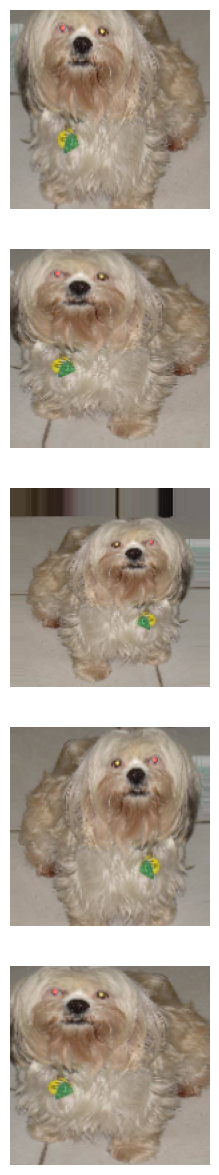

In [7]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [8]:
# 7 Dense, Conv2D, Flatten, Dropout, MaxPooling2D
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 165888)            0         
                                                                 
 dense (Dense)               (None, 128)               2

In [9]:
# 8
history = model.fit(x = train_data_gen, steps_per_epoch = total_train//batch_size, epochs = epochs,validation_data=val_data_gen, validation_steps=total_val// batch_size)

Epoch 1/15
15/15 [==============================] - 34s 1s/step - loss: 1.6577 - accuracy: 0.5096 - val_loss: 0.6824 - val_accuracy: 0.5346
Epoch 2/15
15/15 [==============================] - 18s 1s/step - loss: 0.6711 - accuracy: 0.5486 - val_loss: 0.6459 - val_accuracy: 0.6127
Epoch 3/15
15/15 [==============================] - 20s 1s/step - loss: 0.6486 - accuracy: 0.6052 - val_loss: 0.6315 - val_accuracy: 0.6406
Epoch 4/15
15/15 [==============================] - 20s 1s/step - loss: 0.6193 - accuracy: 0.6603 - val_loss: 0.6090 - val_accuracy: 0.6562
Epoch 5/15
15/15 [==============================] - 20s 1s/step - loss: 0.6088 - accuracy: 0.6672 - val_loss: 0.6038 - val_accuracy: 0.6562
Epoch 6/15
15/15 [==============================] - 19s 1s/step - loss: 0.5951 - accuracy: 0.6715 - val_loss: 0.6107 - val_accuracy: 0.6607
Epoch 7/15
15/15 [==============================] - 20s 1s/step - loss: 0.5970 - accuracy: 0.6784 - val_loss: 0.5708 - val_accuracy: 0.7087
Epoch 8/15
15/15 [==

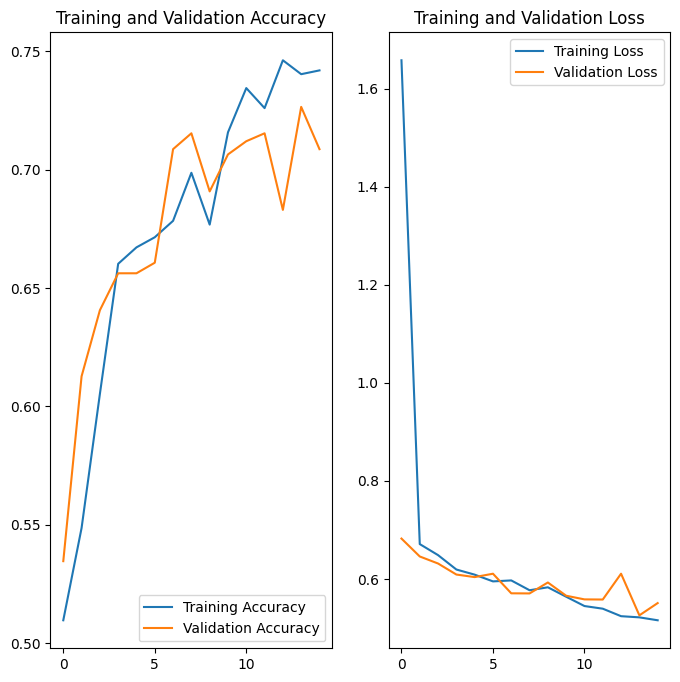

In [10]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Testing the model

1/1 [==============================] - 0s 277ms/step


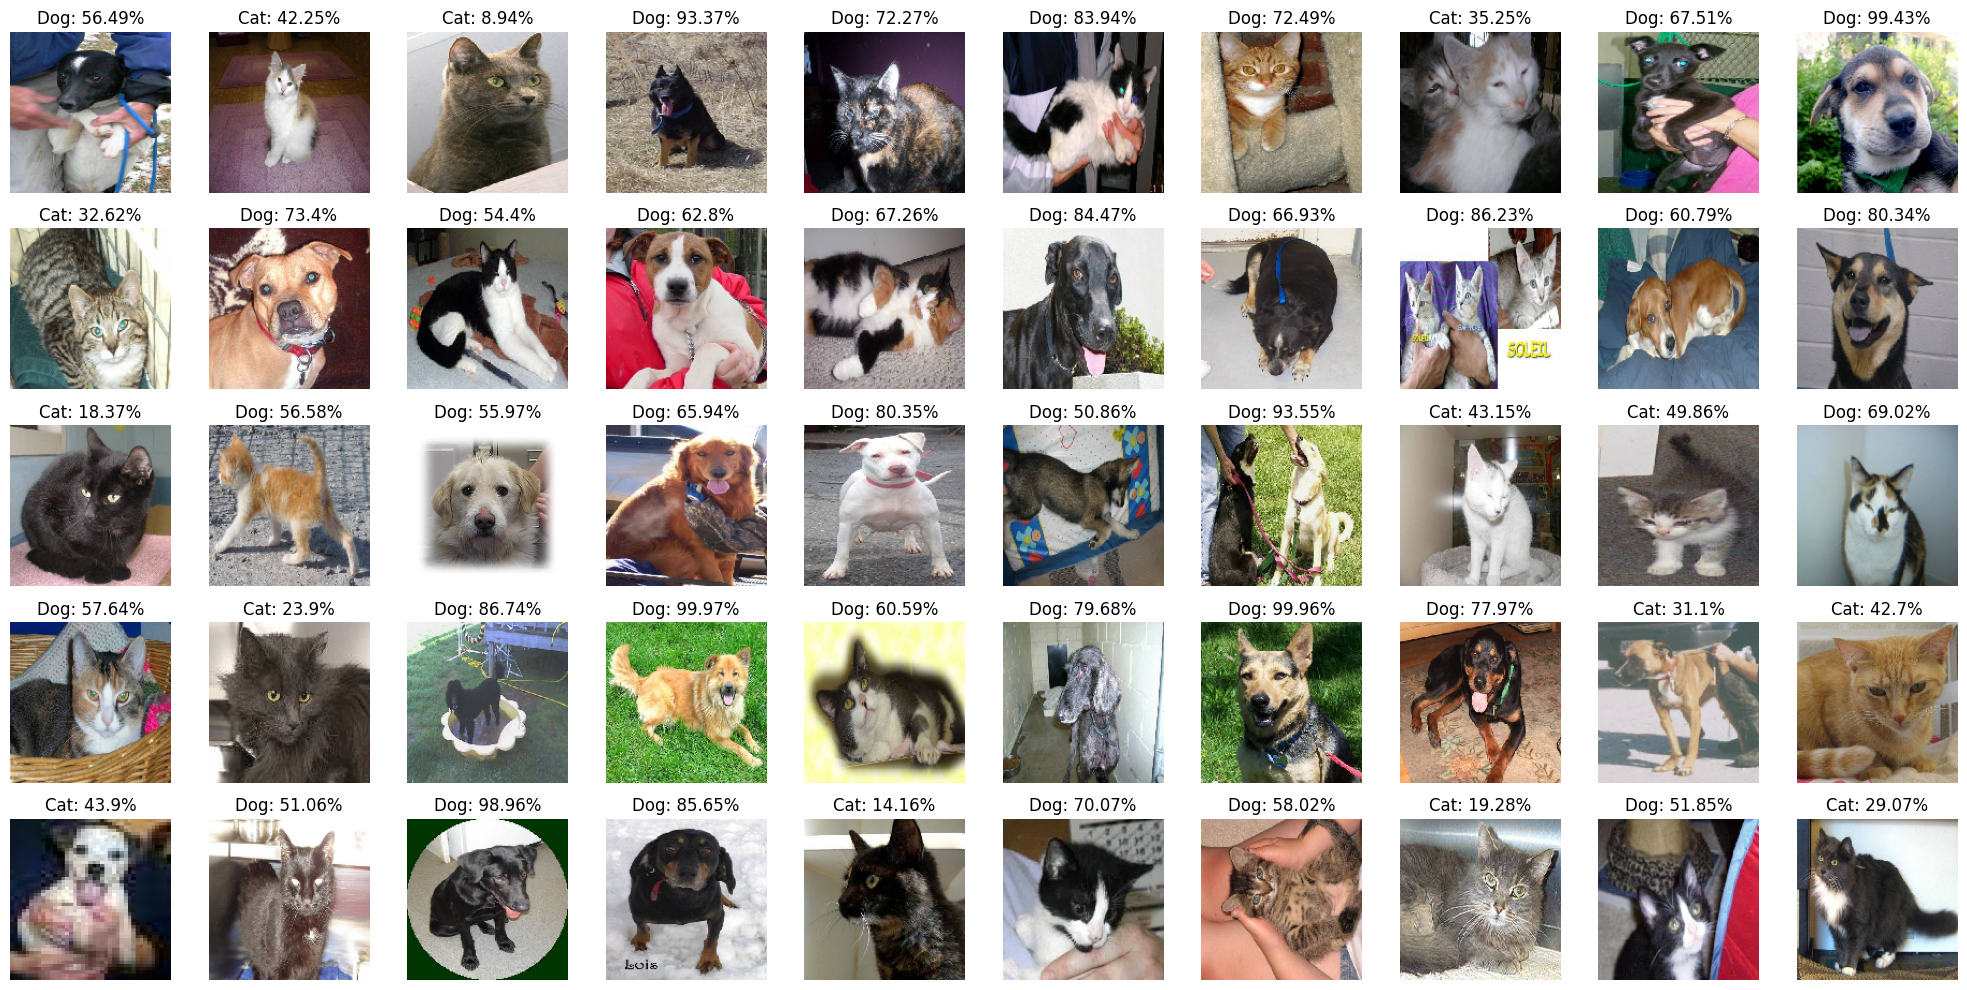

In [22]:
probabilities = model.predict(test_data_gen)
def plotImages(images_arr, probabilities):
    fig, axes = plt.subplots(5, 10, figsize=(20, 10))
    axes = axes.flatten()
    for img, probability, ax in zip(images_arr, probabilities, axes):
        ax.imshow(img)
        ax.axis('off')
        label = 'Dog' if probability > 0.5 else 'Cat'
        ax.set_title(f'{label}: {round(probability[0]*100, 2)}%')
    plt.tight_layout()
    plt.show()

probabilities = model.predict(test_data_gen)
plotImages(test_data_gen[0][0], probabilities)

In [19]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if np.round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 68.0% of the images of cats and dogs.
You passed the challenge!
